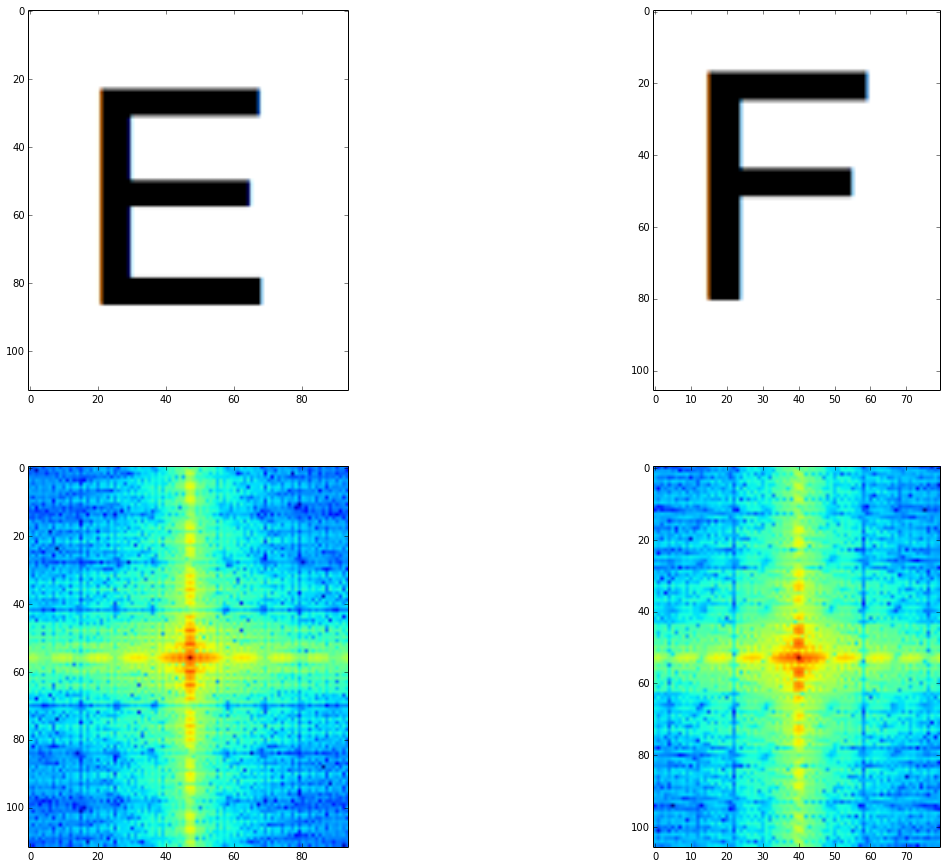

In [1]:
from __future__ import division
import pylab
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from cmath import exp, pi, phase
from scipy.misc import imread
plt.rcParams['figure.figsize'] = (20.0, 15.0)

from scipy.fftpack import fft, fft2, fftn, fftshift

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
letters = "ABCDEF"
letters = "EF"
n = len(letters)


f, axes = plt.subplots(2, n)
for i, letter in enumerate(letters):
    l = imread("./letters/{}.png".format(letter))
    axes[0][i].imshow(l)
    Fl = fftshift(fft2(rgb2gray(l)))
    axes[1][i].imshow(np.log10( np.abs(Fl) ))



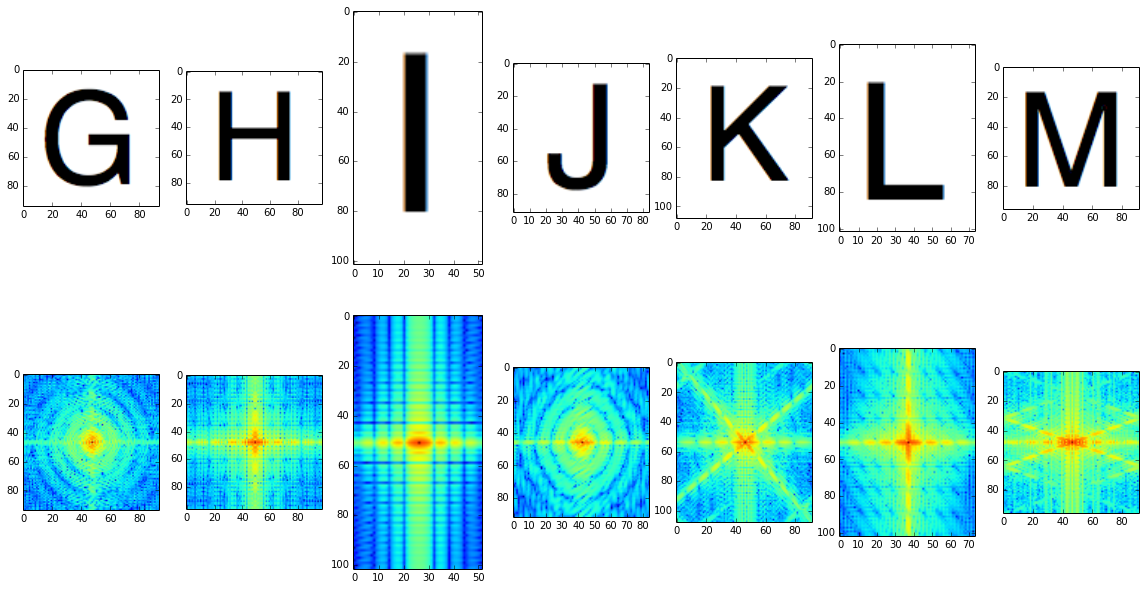

In [37]:
letters = "GHIJKLM"
n = len(letters)

f, axes = plt.subplots(2, n)
for i, letter in enumerate(letters):
    l = imread("./letters/{}.png".format(letter))
    axes[0][i].imshow(l)
    Fl = fftshift(fft2(rgb2gray(l)))
    axes[1][i].imshow(np.log10( np.abs(Fl) ))

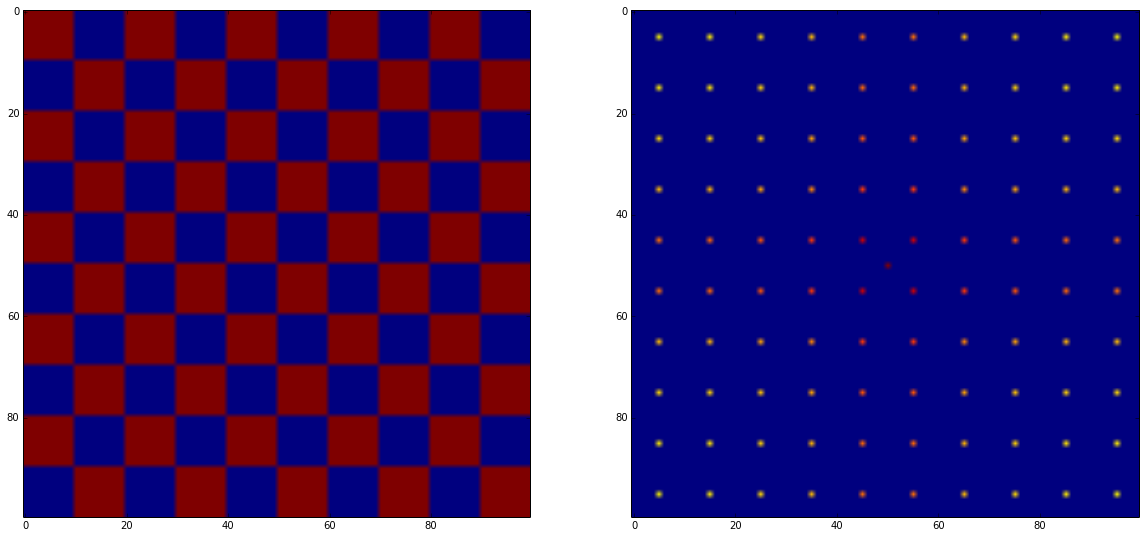

In [17]:
f, axes = plt.subplots(1, 2)
def squares(x,y): return 1 if (x // 10) % 2 == ((y // 10) % 2) else 0
checkerboard = np.array([[squares(x,y) for x in range(100)] for y in range(100)])
axes[0].imshow(checkerboard)
a = np.log10(np.abs(fftshift(fft2(checkerboard))) + 0.01)
axes[1].imshow(a)


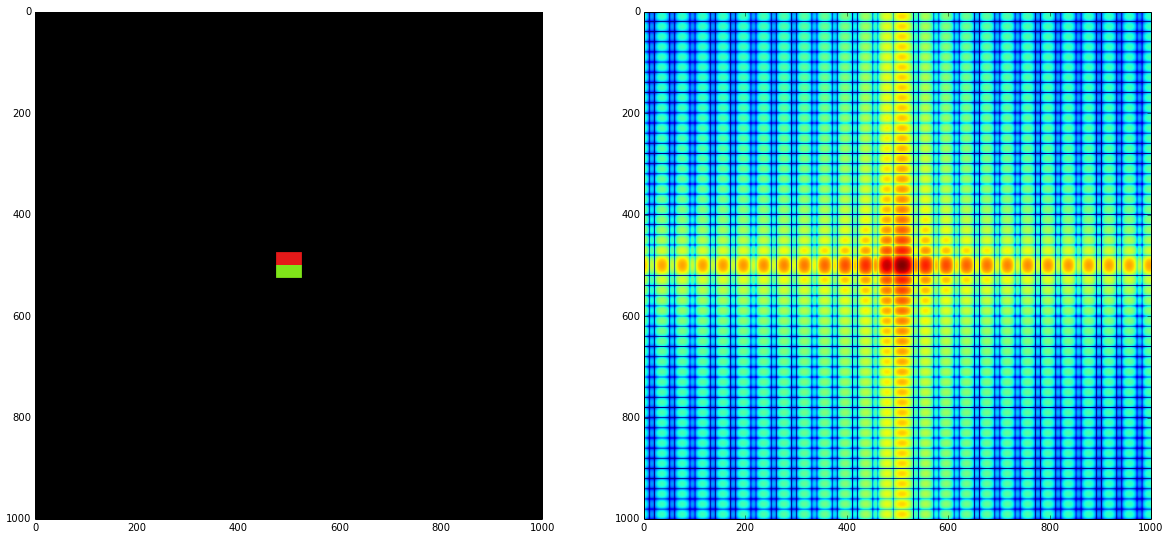

In [55]:
from colorsys import hls_to_rgb

def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + pi)  / (2 * pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c

f, axes = plt.subplots(1, 2)
def T(x):
    return 1 if abs(x) < 0.5 else 0

def phase_inverting_square(x,y):
    a = 1.0
    return T(y/a) * ( T((2*x/a + 0.5)) + 1j*T((2*x/a - 0.5)))
    
size = np.linspace(-10, 10, 1000)
checkerboard = np.array([[phase_inverting_square(x,y) for x in size] for y in size])
axes[0].imshow(colorize(checkerboard))
a = np.log10(np.abs(fftshift(fft2(checkerboard))) + 0.01)
axes[1].imshow(a)